# BORROWER'S CREDIT RISK MODEL

In this project, my aim is to create a borrower's credit risk model for lenders. The Lending Club releases all data which contains approved or declined loan applications. You can download the data sets from this [website](https://www.lendingclub.com/auth/login?login_url=%2Fstatistics%2Fadditional-statistics%3F). Let's start with exploring and cleaning data.

### Opening and Clearing Data

In [1]:
import pandas as pd

I imported the Pandas library especially to use on my exploring and cleaning process.

In [2]:
loans= pd.read_csv('loans_2007.csv')
loans.iloc[0]

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id                                1077501
member_id                      1.2966e+06
loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [4]:
loans.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 471701350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

There are a lot of columns in the data set and some of them are seen as useless. I have to decide which column is useful for my prediction model. 

In [6]:
# I will drop some colmns which is in cols list.
cols=['id',
      'member_id',
      'funded_amnt',
      'funded_amnt_inv',
      'grade',
      'sub_grade',
      'emp_title',
      'issue_d',
      'zip_code',
      'out_prncp',
      'out_prncp_inv',
      'total_pymnt',
      'total_pymnt_inv',
      'total_rec_prncp',
      'total_rec_int',
      'total_rec_late_fee',
      'recoveries',
      'collection_recovery_fee',
      'last_pymnt_d',
      'last_pymnt_amnt'
      
]

I don't need the "id" and "member_id" columns. The "grade" and the "sub_grade" columns have the same information with the "int_rate" column. The "emp_title" column can be useful with additional data, but I don't have this data and it is useless for me. Only 3 of the 5 digits are visible in the "zip_code" column, so it is redundant. You can see the list of columns below which leak data from the future:
<br>
-"funded_amnt",
<br>
-"funded_amnt_inv",
<br>
-"issue_d",
<br>
-"out_prncp",
<br>
-"out_prncp_inv",
<br> 
-"out_prncp_inv",
<br>
-"total_pymnt", 
<br>
-"total_pymnt_inv", 
<br>
-"total_rec_prncp", 
<br>
-"total_rec_int", 
<br>
-"total_rec_late_fee", 
<br>
-"recoveries",
<br>
-"collection_recovery_fee",
<br>
-"last_pymnt_d", 
<br>
-"last_pymnt_amnt".
<br>
<br>
All of these columns have information about loans after the loans already started to be paid off. Let's drop these columns.

In [7]:
loans= loans.drop(cols,axis=1)

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

Now, I have 32 columns to use. The 'loan_status' column shows that loan is accepted or dismissed. This column has text type values. Let's change the column type from text to numerical.

In [9]:
loans['loan_status'].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

I will only use entries which have 'Charged Off', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid' and 'Does not meet the credit policy. Status:Charged Off' values. This is because my aim is to make predictions about loans which are paid or not paid. Other values do not give proper information for my model. I will start with dropping the entries which have values out of our need.

In [10]:
loans= loans[(loans['loan_status']=='Fully Paid')|(loans['loan_status']=='Charged Off')|(loans['loan_status']=='Does not meet the credit policy. Status:Fully Paid')|
             (loans['loan_status']=='Does not meet the credit policy. Status:Charged Off')]

In [11]:
loans.shape

(41519, 32)

I will use a binary system.


In [12]:
binary_status= {'loan_status': {'Fully Paid':1, 'Charged Off':0, 'Does not meet the credit policy. Status:Fully Paid':1,
                               'Does not meet the credit policy. Status:Charged Off':0}}

In [13]:
loans= loans.replace(binary_status)

In [14]:
loans.loan_status.value_counts()

1    35124
0     6395
Name: loan_status, dtype: int64

After that, I will drop the columns which have only one unique value. These columns are not able to give information for the prediction model.


In [15]:
orig_cols=loans.columns
drop_cols=[]
for col in orig_cols:
    col_series=loans[col].dropna().unique()
    if len(col_series)==1:
        drop_cols.append(col)

In [16]:
loans=loans.drop(drop_cols,axis=1)
print(drop_cols)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'chargeoff_within_12_mths']


### Preparing Features


In this step, I will prepare the features for my prediction models. My focus is on the "Fully Paid", the "Charged Off", the "Does not meet the credit policy. Status:Fully Paid" and the "Does not meet the credit policy. Status:Charged Off" entries on the "loan_status" column. As you remember, my value is 1 for the "Fully Paid" and the "Does not meet the credit policy. Status:Fully Paid" entries; and 0 for the "Charged Off" and he "Does not meet the credit policy. Status:Charged Off" entries.

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41519 entries, 0 to 42535
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             41519 non-null  float64
 1   term                  41519 non-null  object 
 2   int_rate              41519 non-null  object 
 3   installment           41519 non-null  float64
 4   emp_length            40449 non-null  object 
 5   home_ownership        41519 non-null  object 
 6   annual_inc            41515 non-null  float64
 7   verification_status   41519 non-null  object 
 8   loan_status           41519 non-null  int64  
 9   purpose               41519 non-null  object 
 10  title                 41506 non-null  object 
 11  addr_state            41519 non-null  object 
 12  dti                   41519 non-null  float64
 13  delinq_2yrs           41490 non-null  float64
 14  earliest_cr_line      41490 non-null  object 
 15  inq_last_6mths     

Some columns have missing values, I have to get rid of these missing values. I will detect the missing values and develop a strategy to clean them.


In [18]:
null_count=loans.isnull().sum()
print(null_count[null_count>0])

emp_length              1070
annual_inc                 4
title                     13
delinq_2yrs               29
earliest_cr_line          29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_util                90
total_acc                 29
last_credit_pull_d         4
acc_now_delinq            29
delinq_amnt               29
pub_rec_bankruptcies    1365
tax_liens                105
dtype: int64


The "emp_length" column and the "pub_rec_bankruptcies" columns have high amounts of missing values.


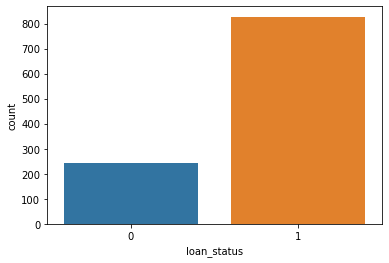

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(x='loan_status', data=loans[loans['emp_length'].isnull()])
plt.show()

Most of the missing values are in the "Fully Paid" entries.


In [20]:
#The "pub_rec_bankruptcies" column will be dropped.
#Other rows which have missing values will be dropped.
loans=loans.drop('pub_rec_bankruptcies',axis=1)
loans=loans.dropna(axis=0)

I dropped the "pub_rec_bankruptcies" column because this column won't give me predictive values. After that, I only dropped the entries from: 
<br>
-"emp_length",
<br>
-"title",
<br>
-"revol_util",
<br>
-"last_credit_pull_d" columns. 
<br>
I didn't drop these columns because I will use them on my prediction.

In [21]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40273 entries, 0 to 42478
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            40273 non-null  float64
 1   term                 40273 non-null  object 
 2   int_rate             40273 non-null  object 
 3   installment          40273 non-null  float64
 4   emp_length           40273 non-null  object 
 5   home_ownership       40273 non-null  object 
 6   annual_inc           40273 non-null  float64
 7   verification_status  40273 non-null  object 
 8   loan_status          40273 non-null  int64  
 9   purpose              40273 non-null  object 
 10  title                40273 non-null  object 
 11  addr_state           40273 non-null  object 
 12  dti                  40273 non-null  float64
 13  delinq_2yrs          40273 non-null  float64
 14  earliest_cr_line     40273 non-null  object 
 15  inq_last_6mths       40273 non-null 

In [22]:
loans.loan_status.value_counts()

1    34153
0     6120
Name: loan_status, dtype: int64

In [23]:
print(loans.dtypes.value_counts())

float64    13
object     11
int64       1
dtype: int64


I need only numerical data types to use. I will explore the columns which are object data type.


In [24]:
objects=loans.select_dtypes(include=['object'])
print(objects.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Jun-2016
Name: 0, dtype: object


In [25]:
cols= [ 'home_ownership', 'verification_status', 'emp_length','term','addr_state']
for c in cols:
    print('Column',c)
    print(loans[c].value_counts())
    print('======================================================')

Column home_ownership
RENT        19303
MORTGAGE    17883
OWN          2951
OTHER         134
NONE            2
Name: home_ownership, dtype: int64
Column verification_status
Not Verified       17978
Verified           12471
Source Verified     9824
Name: verification_status, dtype: int64
Column emp_length
10+ years    9003
< 1 year     4940
2 years      4641
3 years      4282
4 years      3551
1 year       3503
5 years      3372
6 years      2318
7 years      1811
8 years      1546
9 years      1306
Name: emp_length, dtype: int64
Column term
 36 months    30530
 60 months     9743
Name: term, dtype: int64
Column addr_state
CA    7096
NY    3839
FL    2917
TX    2788
NJ    1903
IL    1591
PA    1571
VA    1423
GA    1419
MA    1345
OH    1250
MD    1076
AZ     856
WA     833
CO     808
CT     767
NC     765
MI     751
MO     721
MN     616
NV     494
WI     475
SC     471
AL     451
LA     444
OR     438
KY     341
OK     302
KS     274
UT     267
AR     244
DC     219
RI     203
NM    

I counted the number of each value for the columns below: 
<br>
['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state'] 
<br>
I will develop strategies to change data types while using these counts.

In [26]:
print(loans['title'].value_counts())
print('====================================================================')
print(loans['purpose'].value_counts())

Debt Consolidation                       2134
Debt Consolidation Loan                  1625
Personal Loan                             669
Consolidation                             517
debt consolidation                        489
                                         ... 
AMK                                         1
Amusement Ride Development & Used Car       1
Chase CC                                    1
Cc                                          1
Consolidate Vespa & Credit Cards            1
Name: title, Length: 20420, dtype: int64
debt_consolidation    18813
credit_card            5224
other                  4092
home_improvement       3013
major_purchase         2204
small_business         1875
car                    1520
wedding                 972
medical                 711
moving                  593
educational             400
house                   397
vacation                362
renewable_energy         97
Name: purpose, dtype: int64


In [27]:
#I will use mapping method to encode the 'emp_length' column.
mapping= {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '1 year': 1,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '< 1 year': 0,
        'n/a': 0
 
    }
}

loans= loans.replace(mapping)

In [28]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40273 entries, 0 to 42478
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            40273 non-null  float64
 1   term                 40273 non-null  object 
 2   int_rate             40273 non-null  object 
 3   installment          40273 non-null  float64
 4   emp_length           40273 non-null  int64  
 5   home_ownership       40273 non-null  object 
 6   annual_inc           40273 non-null  float64
 7   verification_status  40273 non-null  object 
 8   loan_status          40273 non-null  int64  
 9   purpose              40273 non-null  object 
 10  title                40273 non-null  object 
 11  addr_state           40273 non-null  object 
 12  dti                  40273 non-null  float64
 13  delinq_2yrs          40273 non-null  float64
 14  earliest_cr_line     40273 non-null  object 
 15  inq_last_6mths       40273 non-null 

In [29]:
#I will drop some columns again.
loans= loans.drop(['title', 'addr_state','earliest_cr_line','last_credit_pull_d'], axis=1)

I dropped the columns above because they have a lot of unique values, and they are not useful with these unique entries for my prediction.


In [30]:
#I will clean "%" character from two columns.
loans['int_rate']= loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util']= loans['revol_util'].str.rstrip('%').astype('float')

In [31]:
#I will encode the columns which are in the list below.
cat_columns=['home_ownership','verification_status','purpose','term']
dummy_df= pd.get_dummies(loans[cat_columns])
loans= pd.concat([loans,dummy_df], axis=1)
loans= loans.drop(cat_columns,axis=1)

In [32]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40273 entries, 0 to 42478
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            40273 non-null  float64
 1   int_rate                             40273 non-null  float64
 2   installment                          40273 non-null  float64
 3   emp_length                           40273 non-null  int64  
 4   annual_inc                           40273 non-null  float64
 5   loan_status                          40273 non-null  int64  
 6   dti                                  40273 non-null  float64
 7   delinq_2yrs                          40273 non-null  float64
 8   inq_last_6mths                       40273 non-null  float64
 9   open_acc                             40273 non-null  float64
 10  pub_rec                              40273 non-null  float64
 11  revol_bal                   

Now, I have 38 columns and 40273 entries to use. They are numerical values right now. I created my features and I can proceed to the prediction step.

In [33]:
loans['tax_liens'].value_counts()

0.0    40272
1.0        1
Name: tax_liens, dtype: int64

### Prediction Step

I will use FPR and TPR metrics to observe my model's success because my data is inbalanced. I want to get money. I do not want to give money to the wrong person. If I give money to the wrong person, we will lose money. So, my TPR and FPR values should be low on the test process.

In [34]:
cols=loans.columns
train_cols= cols.drop('loan_status')
x=loans[train_cols]
y= loans['loan_status']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [37]:
y_train.value_counts()

1    27277
0     4941
Name: loan_status, dtype: int64

In [38]:
y_test.value_counts()

1    6876
0    1179
Name: loan_status, dtype: int64

In [39]:
import numpy as np
predictions= pd.Series(np.ones(loans.shape[0]))

In [40]:
fp_filter= (predictions==1)& (loans['loan_status']==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(loans['loan_status']==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (loans['loan_status']==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (loans['loan_status']==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)


1.0
1.0


In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(predictions,loans['loan_status'])

array([[    0,     0],
       [ 6120, 34153]])

In [43]:
predictions.value_counts()

1.0    40273
dtype: int64

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf= RandomForestClassifier()


In [46]:
rf.fit(x_train,y_train)
predictions= rf.predict(x_train)

In [47]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

1.0
0.00020238818053025704


In [48]:
confusion_matrix(predictions, y_train)

array([[ 4940,     0],
       [    1, 27277]])

In [49]:
predictions= rf.predict(x_test)

In [50]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9959278650378127
0.9838846480067854


In [51]:
confusion_matrix(predictions, y_test)

array([[  19,   28],
       [1160, 6848]])

In [52]:
#croo val

In [53]:
from sklearn.model_selection import cross_val_predict

In [54]:
predictions=cross_val_predict(rf, x_train, y_train, cv=10)
predictions= pd.Series(predictions)

In [55]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9943653762082868
0.9917449473384572


In [56]:
confusion_matrix(predictions, y_train)

array([[   82,   112],
       [ 4859, 27165]])

In [57]:
# balanced random

In [58]:
rf= RandomForestClassifier(class_weight='balanced', random_state=101)
predictions=cross_val_predict(rf, x_train, y_train, cv=10)
predictions= pd.Series(predictions)

In [59]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9975227085053675
0.9980074010816966


In [60]:
confusion_matrix(predictions, y_train)

array([[   41,    47],
       [ 4900, 27230]])

In [61]:
rf.fit(x_train,y_train)
predictions= rf.predict(x_test)

In [62]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9973821989528796
0.993214588634436


In [63]:
confusion_matrix(predictions, y_test)

array([[   8,   18],
       [1171, 6858]])

In [64]:
#penalty

In [65]:
penalty= {
    0:12,
    1:1
}
rf= RandomForestClassifier(class_weight=penalty)
predictions= cross_val_predict(rf,x_train,y_train, cv=15)
predictions=pd.Series(predictions)

In [66]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9978627289065916
0.9977227440933675


In [67]:
confusion_matrix(predictions, y_train)

array([[   29,    44],
       [ 4912, 27233]])

In [68]:
rf.fit(x_train,y_train)
predictions= rf.predict(x_test)

In [69]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9978184991273996
0.9923664122137404


In [70]:
confusion_matrix(predictions, y_test)

array([[   9,   15],
       [1170, 6861]])

In [71]:
# logistic

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr= LogisticRegression()

In [74]:
lr.fit(x_train,y_train)
predictions= lr.predict(x_train)

In [75]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9989001723063387
0.9979761181946974


In [76]:
confusion_matrix(predictions, y_train)

array([[   10,    30],
       [ 4931, 27247]])

In [77]:
predictions= lr.predict(x_test)

In [78]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9986910994764397
0.996607294317218


In [79]:
confusion_matrix(predictions, y_test)

array([[   4,    9],
       [1175, 6867]])

In [80]:
predictions= cross_val_predict(lr,x_train,y_train,cv=3)
predictions=pd.Series(predictions)

In [81]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9988342157672317
0.9980074010816966


In [82]:
confusion_matrix(predictions,y_train)

array([[   12,    31],
       [ 4929, 27246]])

In [83]:
predictions= lr.predict(x_test)

In [84]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.9986910994764397
0.996607294317218


In [85]:
confusion_matrix(predictions, y_test)

array([[   4,    9],
       [1175, 6867]])

In [86]:
#balanced

In [87]:
lr= LogisticRegression(class_weight= 'balanced')
predictions= cross_val_predict(lr, x_train, y_train, cv=3)
predictions= pd.Series(predictions)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [88]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.5101763248652061
0.4998576715058355


In [89]:
confusion_matrix(predictions,y_train)

array([[ 3154, 12637],
       [ 1787, 14640]])

In [90]:
lr.fit(x_train,y_train)
predictions= lr.predict(x_test)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.5221058755090169
0.29940627650551316


In [92]:
confusion_matrix(predictions, y_test)

array([[ 826, 3286],
       [ 353, 3590]])

In [93]:
# penalty 15

In [94]:
penalty= {
    0:15,
    1:1.5
}
lr= LogisticRegression(class_weight=penalty, C=0.01)
predictions= cross_val_predict(lr,x_train,y_train, cv=15)
predictions=pd.Series(predictions)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [95]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.14421722446203916
0.14944491887275832


In [96]:
confusion_matrix(predictions,y_train)

array([[ 4638, 22927],
       [  303,  4350]])

In [97]:
lr.fit(x_train,y_train)
predictions= lr.predict(x_test)

In [98]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.07577079697498545
0.032230703986429174


In [99]:
confusion_matrix(predictions, y_test)

array([[1141, 6355],
       [  38,  521]])

In [100]:
#penalty 12

In [101]:
penalty= {
    0:12,
    1:1
}
lr= LogisticRegression(class_weight=penalty, C=0.01)
predictions= cross_val_predict(lr,x_train,y_train, cv=15)
predictions=pd.Series(predictions)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [102]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.06421528148831787
0.059777967549103334


In [103]:
confusion_matrix(predictions,y_train)

array([[ 4835, 25386],
       [  106,  1891]])

In [104]:
lr.fit(x_train,y_train)
predictions= lr.predict(x_test)

In [105]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.032867946480511924
0.011874469889737066


In [106]:
confusion_matrix(predictions, y_test)

array([[1165, 6650],
       [  14,  226]])

In [107]:
# penalty 10

In [108]:
penalty= {
    0:10.5,
    1:0.75
}
lr= LogisticRegression(class_weight=penalty, C=0.01)
predictions= cross_val_predict(lr,x_train,y_train, cv=15)
predictions=pd.Series(predictions)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [109]:
fp_filter= (predictions==1)& (y_train==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_train==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_train==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_train==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.025307232719677466
0.02533447196128665


In [110]:
confusion_matrix(predictions,y_train)

array([[ 4898, 26535],
       [   43,   742]])

In [111]:
lr.fit(x_train,y_train)
predictions= lr.predict(x_test)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
fp_filter= (predictions==1)& (y_test==0)
fp= len(predictions[fp_filter])
tp_filter= (predictions==1)&(y_test==1)
tp= len(predictions[tp_filter])
fn_filter= (predictions==0)& (y_test==1)
fn= len(predictions[fn_filter])
tn_filter= (predictions==0)& (y_test==0)
tn= len(predictions[tn_filter])

tpr=tp/(tp+fn)
fpr= fp/(fp+tn)

print(tpr)
print(fpr)

0.02196044211751018
0.007633587786259542


In [113]:
confusion_matrix(predictions, y_test)

array([[1170, 6725],
       [   9,  151]])